<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul 14 07:25:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()


--2021-07-14 07:25:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   105MB/s    in 1.5s    

2021-07-14 07:25:32 (105 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'. '")

There are 2 and 0 images in '10_food_classes_10_percent'. '
There are 10 and 0 images in '10_food_classes_10_percent/test'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/chicken_curry'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/ramen'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/sushi'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/grilled_salmon'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/ice_cream'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/chicken_wings'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/pizza'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/hamburger'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/steak'. '
There are 0 and 250 images in '10_food_classes_10_percent/test/fried_rice'. '
There are 10 and 0 images in '10_food_classes_10_percent/train'. '
There are 0 and 75 images in '10_food_c

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE= (224, 224)
BATCH_SIZE = 32
EPOCHS = 5
train_dir = '10_food_classes_10_percent/train/'
test_dir =  '10_food_classes_10_percent/test/'
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir, target_size = IMG_SIZE, batch_size= BATCH_SIZE, class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size = IMG_SIZE, batch_size= BATCH_SIZE, class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [5]:
import tensorflow as tf
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving to {tensorboard_callback}")
  return tensorboard_callback

In [6]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url, trainable = False, name = "feature_extraction_layer", input_shape = IMG_SIZE+(3,))
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               tf.keras.layers.Dense(num_classes, activation = 'softmax')
  ])
  return model

In [11]:
resnet_model = create_model(resnet_url, num_classes = 10)
resnet_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])
restnet_history = resnet_model.fit(train_data, batch_size = BATCH_SIZE, epochs= EPOCHS, callbacks = [create_tensorboard_callback(dir_name = 'tensorflowhub', experiment_name = "resnet50V2" )], steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Saving to <tensorflow.python.keras.callbacks.TensorBoard object at 0x7f25c85310d0>
Epoch 1/5
24/24 [==============================] - 21s 782ms/step - loss: 1.9960 - accuracy: 0.3280 - val_loss: 1.2319 - val_accuracy: 0.6104
Epoch 2/5
24/24 [==============================] - 18s 790ms/step - loss: 0.9335 - accuracy: 0.7200 - val_loss: 0.8694 - val_accuracy: 0.7228
Epoch 3/5
24/24 [==============================] - 16s 704ms/step - loss: 0.6229 - accuracy: 0.8387 - val_loss: 0.7480 - val_accuracy: 0.7632
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.4822 - accuracy: 0.8760 - val_loss: 0.6958 - val_accuracy: 0.7844
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.3875 - accuracy: 0.8960 - val_loss: 0.6829 - val_accuracy: 0.7776


In [19]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label = 'Val Loss')
  plt.title('Loss')
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val Accuracy')
  plt.title('Accuracy')
  plt.legend()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


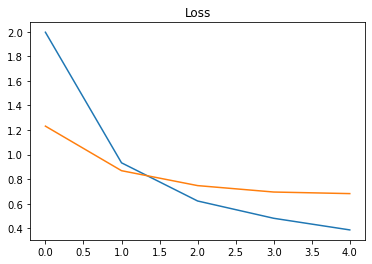

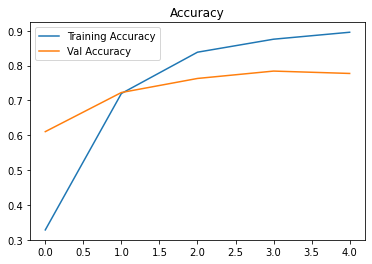

In [23]:
plot_loss_curves(restnet_history)
resnet_model.summary()

In [25]:
efficient_net_model = create_model(efficientnet_url, num_classes=10)
efficient_net_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])
efficient_net_model_history = efficient_net_model.fit(train_data, batch_size = BATCH_SIZE, epochs= EPOCHS, callbacks = [create_tensorboard_callback(dir_name = 'tensorflowhub', experiment_name = "efficientnet80" )], steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Saving to <tensorflow.python.keras.callbacks.TensorBoard object at 0x7f2342fbffd0>
Epoch 1/5
24/24 [==============================] - 24s 757ms/step - loss: 1.8644 - accuracy: 0.4440 - val_loss: 1.3289 - val_accuracy: 0.7368
Epoch 2/5
24/24 [==============================] - 15s 626ms/step - loss: 1.0675 - accuracy: 0.7760 - val_loss: 0.8861 - val_accuracy: 0.8244
Epoch 3/5
24/24 [==============================] - 17s 747ms/step - loss: 0.7633 - accuracy: 0.8400 - val_loss: 0.7060 - val_accuracy: 0.8432
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.6112 - accuracy: 0.8693 - val_loss: 0.6212 - val_accuracy: 0.8492
Epoch 5/5
24/24 [==============================] - 15s 653ms/step - loss: 0.5170 - accuracy: 0.8920 - val_loss: 0.5629 - val_accuracy: 0.8552


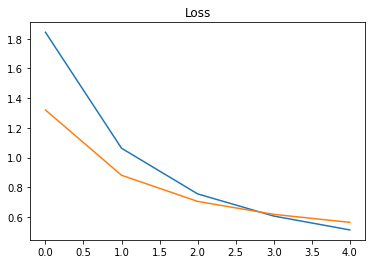

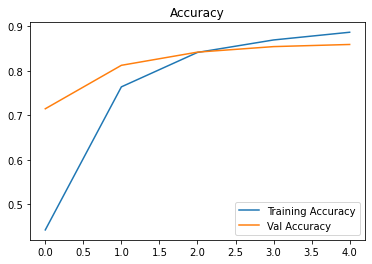

In [24]:
plot_loss_curves(efficient_net_model_history)

In [37]:
!tensorboard dev upload --logdir./tensorflowhub/\
  --name "EfficientNet VS ResNet "\
  --one_shot\


2021-07-14 07:54:56.680848: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: unrecognized arguments: --logdir./tensorflowhub/


In [40]:
!pip install -U tensorboard 


Requirement already up-to-date: tensorboard in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [46]:

!tensorboard dev upload --logdir ./tensorflowhub/\
  --name "EfficientNet VS ResNet "\
  

2021-07-14 08:04:15.184821: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/k98nn4XyRnGk6C5ILUGkdA/

[2021-07-14T08:04:16] Started scanning logdir.
[2021-07-14T08:04:20] Total uploaded: 120 scalars, 0 tensors, 4 binary objects (11.4 MB)


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/k98nn4XyRnGk6C5ILUGkdA/
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in r